<a href="https://colab.research.google.com/github/Nadaramadan1/PythonProject/blob/main/Nada_Ramadan_tree_based_models_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/heart disease.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [5]:
data.duplicated().sum()

np.int64(0)

# Feature engineering

In [14]:
data['Age_Cholesterol'] = data['Age'] * data['Cholesterol']
data['BP_HR'] = data['RestingBP'] * data['MaxHR']

In [15]:
from sklearn.preprocessing import LabelEncoder

data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 40, 55, 70, 100], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])
data['AgeGroup'] = LabelEncoder().fit_transform(data['AgeGroup'])

In [16]:
data['HighCholesterol'] = (data['Cholesterol'] > 240).astype(int)

In [17]:
from sklearn.preprocessing import LabelEncoder

data['OldpeakLevel'] = pd.cut(data['Oldpeak'], bins=[-1, 1, 2, 6], labels=['Low', 'Moderate', 'High'])
data['OldpeakLevel'] = LabelEncoder().fit_transform(data['OldpeakLevel'])

In [18]:
data['StressIndex'] = data['MaxHR'] - data['Age']

# Decision tree model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [20]:
df = data.copy()
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [21]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [24]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8043478260869565
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        77
           1       0.90      0.75      0.82       107

    accuracy                           0.80       184
   macro avg       0.81      0.82      0.80       184
weighted avg       0.82      0.80      0.81       184



# model tuning (grid search cv )

In [25]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


In [26]:
y_pred = best_model.predict(X_test)
print("Improved Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Improved Accuracy: 0.8478260869565217
              precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



# Random forest model

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8858695652173914
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



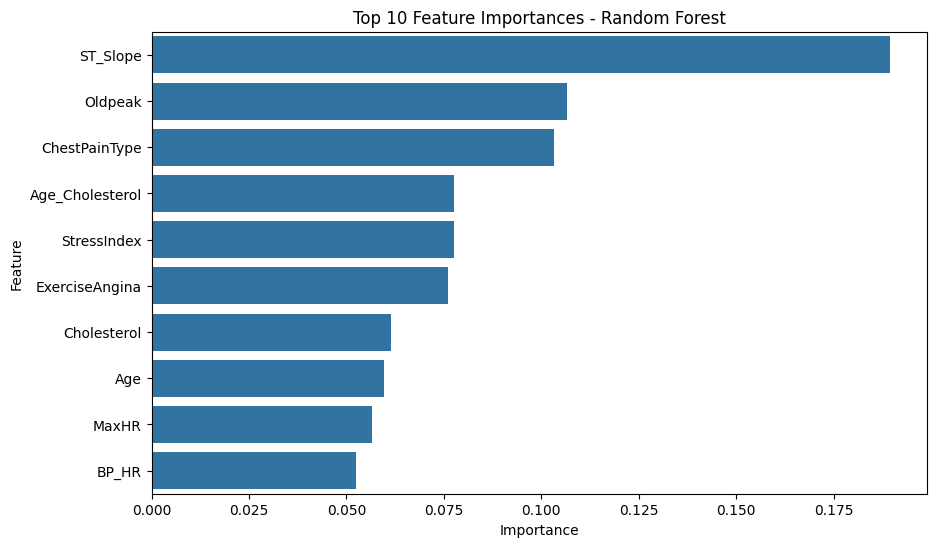

In [28]:
import pandas as pd

importances = rf_model.feature_importances_
features = X_train.columns
rf_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df.head(10))
plt.title("Top 10 Feature Importances - Random Forest")
plt.show()


# Smote to improve imbalanced data for random forest

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_resampled).value_counts())


Before SMOTE: HeartDisease
1    401
0    333
Name: count, dtype: int64
After SMOTE: HeartDisease
0    401
1    401
Name: count, dtype: int64


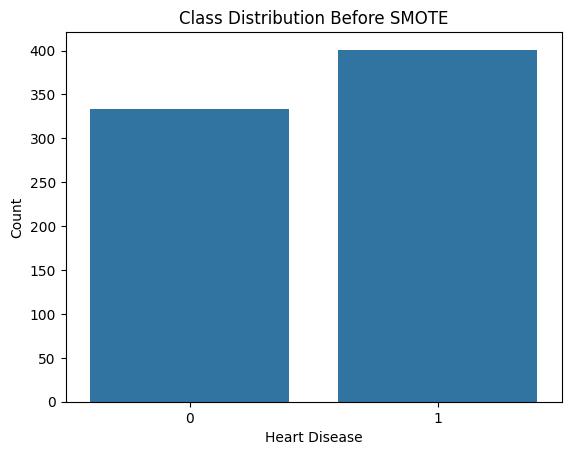

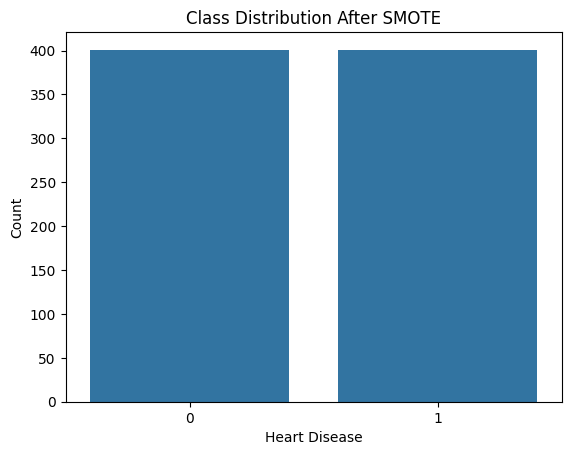

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Before SMOTE
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

# After SMOTE
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()


In [31]:
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_resampled, y_resampled)

y_pred_smote = rf_smote.predict(X_test)


In [32]:
from sklearn.metrics import classification_report, accuracy_score

print("Random Forest with SMOTE Accuracy:", accuracy_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))


Random Forest with SMOTE Accuracy: 0.8804347826086957
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        77
           1       0.93      0.86      0.89       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.88      0.88       184



# XGboost model

In [33]:
from xgboost import XGBClassifier

xgb_no_smote = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_no_smote.fit(X_train, y_train)
y_pred_xgb = xgb_no_smote.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("XGBoost  Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost  Accuracy: 0.8695652173913043
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        77
           1       0.92      0.85      0.88       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



# XGboost model after smote

In [35]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_resampled, y_resampled)
y_pred_xgb = xgb_model.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))



XGBoost Accuracy: 0.8586956521739131
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:42:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [39]:
from sklearn.metrics import classification_report
import pandas as pd

# Example usage for each model
reports = []

# Decision Tree
dt_report = classification_report(y_test, model.predict(X_test), output_dict=True)
reports.append(summarize_classification_report(dt_report, "Decision Tree"))

# Tuned Decision Tree
dt_tuned_report = classification_report(y_test, best_model.predict(X_test), output_dict=True)
reports.append(summarize_classification_report(dt_tuned_report, "Tuned Decision Tree"))

# Random Forest
rf_report = classification_report(y_test, rf_model.predict(X_test), output_dict=True)
reports.append(summarize_classification_report(rf_report, "Random Forest"))

# Random Forest with SMOTE
rf_smote_report = classification_report(y_test, rf_smote.predict(X_test), output_dict=True)
reports.append(summarize_classification_report(rf_smote_report, "Random Forest + SMOTE"))

# XGBoost
xgb_report = classification_report(y_test, xgb_no_smote.predict(X_test), output_dict=True)
reports.append(summarize_classification_report(xgb_report, "XGBoost"))

# XGBoost with SMOTE
xgb_smote_report = classification_report(y_test, xgb_model.predict(X_test), output_dict=True)
reports.append(summarize_classification_report(xgb_smote_report, "XGBoost + SMOTE"))

# Convert to DataFrame for display
summary_df = pd.DataFrame(reports)
display(summary_df)


,Model,Accuracy,Precision (Class 0),Recall (Class 0),F1-Score (Class 0),Precision (Class 1),Recall (Class 1),F1-Score (Class 1),Macro Avg F1,Weighted Avg F1
0,Decision Tree,0.804348,0.715789,0.883117,0.790698,0.898876,0.747664,0.816327,0.803512,0.805601
1,Tuned Decision Tree,0.847826,0.795181,0.857143,0.825000,0.891089,0.841121,0.865385,0.845192,0.848485
2,Random Forest,0.885870,0.850000,0.883117,0.866242,0.913462,0.887850,0.900474,0.883358,0.886149
3,Random Forest + SMOTE,0.880435,0.823529,0.909091,0.864198,0.929293,0.859813,0.893204,0.878701,0.881065
4,XGBoost,0.869565,0.811765,0.896104,0.851852,0.919192,0.850467,0.883495,0.867673,0.870253
5,XGBoost + SMOTE,0.858696,0.807229,0.870130,0.837500,0.900990,0.850467,0.875000,0.856250,0.859307
